In [74]:
# set up environment
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# import data
diabetes = datasets.load_diabetes(as_frame=True)
data = diabetes['data']
target = diabetes['target']

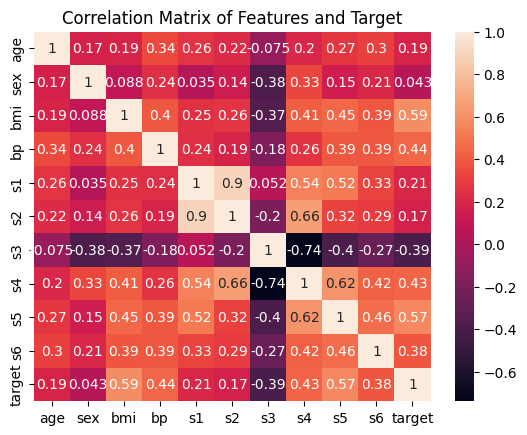

Top four most informative features with respect to target:
bmi    0.586450
s5     0.565883
bp     0.441482
s4     0.430453
Name: target, dtype: float64


In [66]:
# create correlation matrix between features and target
df = pd.concat([data, target], axis=1)
corr_matrix = df.corr()

# visualize correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix of Features and Target")
plt.show()

# find top four most informative features
print("Top four most informative features with respect to target:")
print(corr_matrix['target'].drop('target').abs().sort_values(ascending=False).head(4))

In [67]:
# check for missing values
print("Number of null values in target: ", target.isnull().sum())

# binarize target vector
target = (target >= 140).astype(int)

# split dataset into train-test-validation subsets
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.25)

# transform continuous features to categorical
def bin(data):
    copy = data.copy()
    for column in copy.columns:
        copy[column] = pd.cut(copy[column], bins=5, labels=False)
    return copy

X_test_cat = bin(X_test)
X_train_cat = bin(X_train)
X_val_cat = bin(X_val)

Number of null values in target:  0


Accuracy (Validation Set): 0.775
Precision (Validation Set): 0.854
Recall (Validation Set): 0.759
F1 (Validation Set): 0.804


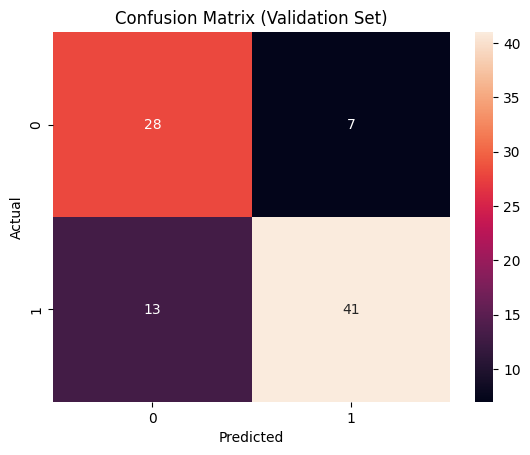


Accuracy (Test Set): 0.753
Precision (Test Set): 0.763
Recall (Test Set): 0.69
F1 (Test Set): 0.725


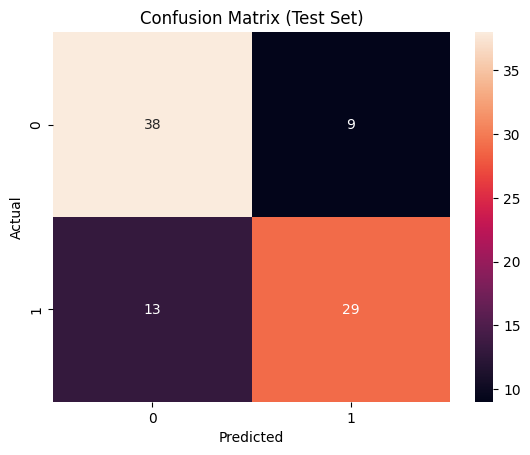

In [68]:
# create GNB model on training set
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# evaluate model on validation set
y_val_pred = gnb.predict(X_val)
print("Accuracy (Validation Set):", round(accuracy_score(y_val, y_val_pred), 3))
print("Precision (Validation Set):", round(precision_score(y_val, y_val_pred), 3))
print("Recall (Validation Set):", round(recall_score(y_val, y_val_pred), 3))
print("F1 (Validation Set):", round(f1_score(y_val, y_val_pred), 3))
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True,
            xticklabels=['0', '1'], 
            yticklabels=['0', '1'])
plt.title('Confusion Matrix (Validation Set)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# evaluate model on test set
y_test_pred = gnb.predict(X_test)
print("\nAccuracy (Test Set):", round(accuracy_score(y_test, y_test_pred), 3))
print("Precision (Test Set):", round(precision_score(y_test, y_test_pred), 3))
print("Recall (Test Set):", round(recall_score(y_test, y_test_pred), 3))
print("F1 (Test Set):", round(f1_score(y_test, y_test_pred), 3))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True,
            xticklabels=['0', '1'], 
            yticklabels=['0', '1'])
plt.title('Confusion Matrix (Test Set)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Accuracy (Validation Set): 0.685
Precision (Validation Set): 0.825
Recall (Validation Set): 0.611
F1 (Validation Set): 0.702


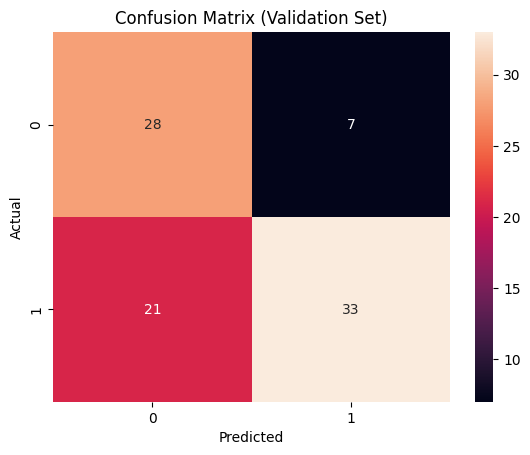

Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best Hyperparameters: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Accuracy (Test Set): 0.798
Precision (Test Set): 0.773
Recall (Test Set): 0.81
F1 (Test Set): 0.791


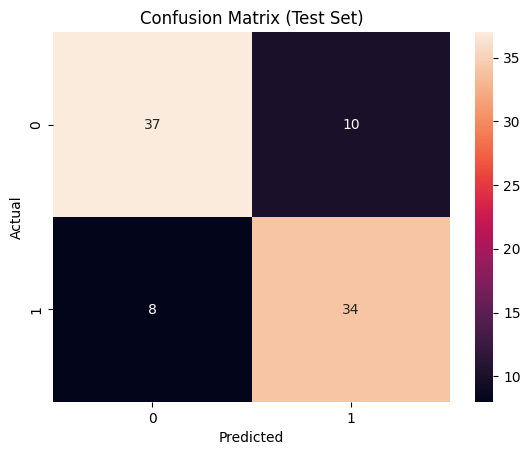

In [69]:
# standardize data for SVC model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
X_test_scaled = scaler.fit_transform(X_test)

# create SVC model on training set
svc = SVC(random_state=42)
svc.fit(X_train_scaled, y_train)

# evaluate SVC model on validation set
y_val_pred = svc.predict(X_val_scaled)
print("Accuracy (Validation Set):", round(accuracy_score(y_val, y_val_pred), 3))
print("Precision (Validation Set):", round(precision_score(y_val, y_val_pred), 3))
print("Recall (Validation Set):", round(recall_score(y_val, y_val_pred), 3))
print("F1 (Validation Set):", round(f1_score(y_val, y_val_pred), 3))
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True,
            xticklabels=['0', '1'], 
            yticklabels=['0', '1'])
plt.title('Confusion Matrix (Validation Set)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# tune hyperparameters
param_grid = {
 'C': [0.1, 1, 10, 100, 1000],  
   'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['rbf','linear','sigmoid']  
}
grid = GridSearchCV(estimator=svc, param_grid=param_grid, refit=True, verbose=3, n_jobs=-1)
grid.fit(X_train_scaled, y_train)
best_params = grid.best_params_
print("Best Hyperparameters:", best_params)

tuned_model = SVC(**best_params, random_state=42)
tuned_model.fit(X_train_scaled, y_train)

# evaluate SVC model on test set
y_test_pred = tuned_model.predict(X_test_scaled)
print("\nAccuracy (Test Set):", round(accuracy_score(y_test, y_test_pred), 3))
print("Precision (Test Set):", round(precision_score(y_test, y_test_pred), 3))
print("Recall (Test Set):", round(recall_score(y_test, y_test_pred), 3))
print("F1 (Test Set):", round(f1_score(y_test, y_test_pred), 3))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True,
            xticklabels=['0', '1'], 
            yticklabels=['0', '1'])
plt.title('Confusion Matrix (Test Set)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Accuracy (Validation Set): 0.64
Precision (Validation Set): 0.729
Recall (Validation Set): 0.648
F1 (Validation Set): 0.686


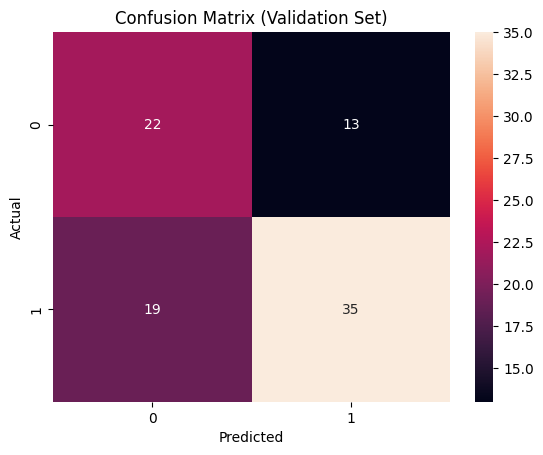


Accuracy (Test Set): 0.618
Precision (Test Set): 0.6
Recall (Test Set): 0.571
F1 (Test Set): 0.585


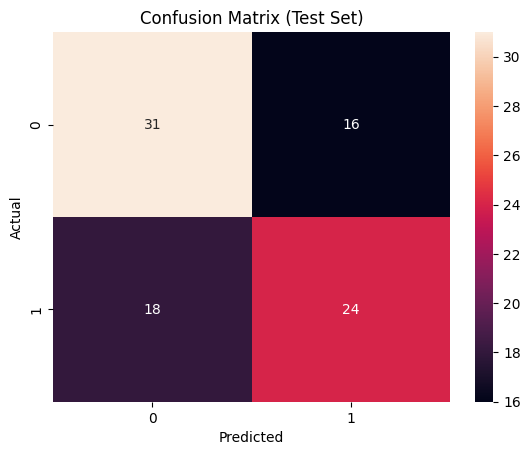

In [75]:
# create decision tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_cat, y_train)

# evaluate model on validation set
y_val_pred = dt.predict(X_val_cat)
print("Accuracy (Validation Set):", round(accuracy_score(y_val, y_val_pred), 3))
print("Precision (Validation Set):", round(precision_score(y_val, y_val_pred), 3))
print("Recall (Validation Set):", round(recall_score(y_val, y_val_pred), 3))
print("F1 (Validation Set):", round(f1_score(y_val, y_val_pred), 3))
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True,
            xticklabels=['0', '1'], 
            yticklabels=['0', '1'])
plt.title('Confusion Matrix (Validation Set)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# evaluate model on test set
y_test_pred = dt.predict(X_test_cat)
print("\nAccuracy (Test Set):", round(accuracy_score(y_test, y_test_pred), 3))
print("Precision (Test Set):", round(precision_score(y_test, y_test_pred), 3))
print("Recall (Test Set):", round(recall_score(y_test, y_test_pred), 3))
print("F1 (Test Set):", round(f1_score(y_test, y_test_pred), 3))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True,
            xticklabels=['0', '1'], 
            yticklabels=['0', '1'])
plt.title('Confusion Matrix (Test Set)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

     age  sex  bmi  bp  s1  s2  s3  s4  s5  s6
109    3    4    1   2   2   2   0   2   1   4
337    2    4    1   4   1   1   1   2   2   2
105    2    4    1   1   1   1   1   1   1   2
138    3    4    3   4   1   1   1   1   2   3
300    2    0    3   1   1   1   1   1   3   3
..   ...  ...  ...  ..  ..  ..  ..  ..  ..  ..
222    1    4    1   3   1   1   1   0   2   2
277    1    0    0   2   1   0   3   0   1   2
404    2    0    2   4   1   1   1   0   1   2
106    0    0    0   1   1   1   1   0   0   0
417    1    0    3   0   1   1   1   1   1   2

[264 rows x 10 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy (Validation Set): 0.719
Precision (Validation Set): 0.784
Recall (Validation Set): 0.741
F1 (Validation Set): 0.762


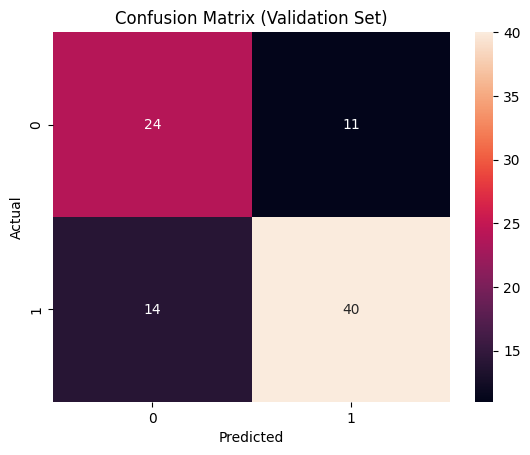


Accuracy (Test Set): 0.629
Precision (Test Set): 0.615
Recall (Test Set): 0.571
F1 (Test Set): 0.593


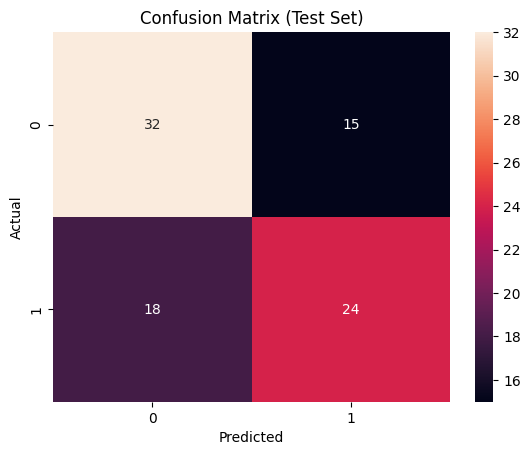

In [105]:
knn = KNeighborsClassifier(n_neighbors=3)

print(X_train_cat)
knn.fit(X_train_cat, y_train)

y_pred=knn.predict(X_test)
print(y_pred)

# evaluate model on validation set
y_val_pred = knn.predict(X_val_cat)
print("Accuracy (Validation Set):", round(accuracy_score(y_val, y_val_pred), 3))
print("Precision (Validation Set):", round(precision_score(y_val, y_val_pred), 3))
print("Recall (Validation Set):", round(recall_score(y_val, y_val_pred), 3))
print("F1 (Validation Set):", round(f1_score(y_val, y_val_pred), 3))
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True,
            xticklabels=['0', '1'], 
            yticklabels=['0', '1'])
plt.title('Confusion Matrix (Validation Set)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# evaluate model on test set
y_test_pred = knn.predict(X_test_cat)
print("\nAccuracy (Test Set):", round(accuracy_score(y_test, y_test_pred), 3))
print("Precision (Test Set):", round(precision_score(y_test, y_test_pred), 3))
print("Recall (Test Set):", round(recall_score(y_test, y_test_pred), 3))
print("F1 (Test Set):", round(f1_score(y_test, y_test_pred), 3))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True,
            xticklabels=['0', '1'], 
            yticklabels=['0', '1'])
plt.title('Confusion Matrix (Test Set)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()